In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 300
import math
import datetime as dt
#from tableone import TableOne, load_dataset
import itertools
import random
import scipy.stats as stats
import warnings
# from pandas.core.common import SettingWithCopyWarning
# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from sklearn.preprocessing import scale


# Data selection merge

In [2]:
fea_select = ["stay_id","time","creatinine","urineoutput","crea_divide_basecrea"] #,"bun"

In [ ]:
df_type = pd.read_csv("../../03.eICU_SAKI_trajCluster/df_mixAK_fea4_C3_eicu.csv")
df_type_filt = df_type.loc[:,["stay_id","groupHPD"]]
df_type_filt = df_type_filt.drop_duplicates()
all_lst = df_type_filt.stay_id.unique().tolist()
print("Number of included patients:",len(all_lst))
df_type_filt["groupHPD"].value_counts()

df_fea_eicu = pd.read_csv("../../03.eICU_SAKI_trajCluster/sk_feature_timescale_Fb2_eicu_filled.csv")
df_fea_eicu = df_fea_eicu[fea_select]
df_fea_eicu = pd.merge(df_fea_eicu,df_type_filt, how="inner",on="stay_id")
df_fea_eicu["dataset"] = 3
df_fea_eicu.head(1)

In [ ]:
df_type = pd.read_csv("../../02.AUMCdb_SAKI_trajCluster/df_mixAK_fea3_C3_aumc.csv")
df_type_filt = df_type.loc[:,["stay_id","groupHPD"]]
df_type_filt = df_type_filt.drop_duplicates()
all_lst = df_type_filt.stay_id.unique().tolist()
print("Number of included patients:",len(all_lst))

df_type_filt["groupHPD"].value_counts()
df_fea_aumc = pd.read_csv("../../02.AUMCdb_SAKI_trajCluster/sk_feature_timescale_Fb2_aumc.csv")
df_fea_aumc = df_fea_aumc[fea_select]
df_fea_aumc = pd.merge(df_fea_aumc,df_type_filt, how="inner",on="stay_id")
df_fea_aumc["dataset"] = 2
df_fea_aumc.head(1)

In [ ]:
df_type = pd.read_csv("../../01.MIMICIV_SAKI_trajCluster_v0314/df_mixAK_fea4_C3.csv")
df_type_filt = df_type.loc[:,["stay_id","groupHPD"]]
df_type_filt = df_type_filt.drop_duplicates()
all_lst = df_type_filt.stay_id.unique().tolist()
print("Number of included patients:",len(all_lst))
df_type_filt["groupHPD"].value_counts()
df_fea_mimic = pd.read_csv("../../01.MIMICIV_SAKI_trajCluster_v0314/sk_feature_timescale_Fb2.csv")
df_fea_mimic = df_fea_mimic[fea_select]
df_fea_mimic = pd.merge(df_fea_mimic,df_type_filt, how="inner",on="stay_id")
df_fea_mimic["dataset"] = 1
df_fea_mimic.head(1)

In [6]:
f1 = ["creatinine","urineoutput","crea_divide_basecrea"]
f2 = ["stay_id","time","groupHPD","dataset"]

df_ = df_fea_mimic
df_f1 = pd.DataFrame(scale(df_[f1]))
df_f1.columns= f1
df_fea_mimic = pd.concat([df_[f2],df_f1],axis=1)

df_ = df_fea_eicu
df_f1 = pd.DataFrame(scale(df_[f1]))
df_f1.columns= f1
df_fea_eicu = pd.concat([df_[f2],df_f1],axis=1)

df_ = df_fea_aumc
df_f1 = pd.DataFrame(scale(df_[f1]))
df_f1.columns= f1
df_fea_aumc = pd.concat([df_[f2],df_f1],axis=1)

In [7]:
df_fea_merge = pd.concat([df_fea_mimic,df_fea_aumc,df_fea_eicu],axis=0)
df_fea_merge.shape,df_fea_merge.head(1)

((195936, 7),
     stay_id  time  groupHPD  dataset  creatinine  urineoutput  \
 0  30003598  -2.0         1        1   -0.299533    -1.031853   
 
    crea_divide_basecrea  
 0              -0.67099  )

# Data Processing and Transformation

In [8]:
def get_data(df_fea,data_select):
    if data_select == "d1":
        df_fea = df_fea.groupby(["stay_id"]).agg('mean').reset_index()
        df_fea = df_fea.drop_duplicates()
        fea_select = ["creatinine","urineoutput","crea_divide_basecrea"] #"bun",
    if data_select == "d2":
        df_fea = df_fea.groupby(by=["stay_id","dataset","groupHPD"]).agg(["mean","max","min"]) #
        df_fea.columns = ['_'.join(col) for col in df_fea.columns]
        df_fea = df_fea.reset_index()
        df_fea = df_fea.drop_duplicates()
        fea_select = ["creatinine_mean","urineoutput_mean","crea_divide_basecrea_mean","creatinine_min","urineoutput_min","crea_divide_basecrea_min","creatinine_max","urineoutput_max","crea_divide_basecrea_max"]#"bun_mean","bun_max","bun_min",
    return df_fea, fea_select

In [ ]:
# Define a function to convert hexadecimal colors to RGB tuples
def hex_to_rgb(hex):
    hex = hex.lstrip('#')
    return tuple(int(hex[i:i+2], 16) for i in (0, 2, 4))

# Define a function to convert RGB tuples to hexadecimal colors
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

# Define a function to calculate the linear interpolation between two RGB tuples
def linear_gradient(rgb1, rgb2, n):# Initialize the gradient array  
    gradient = []
    r_step = (rgb2[0] - rgb1[0]) / (n - 1)# Calculate the step size of each channel
    g_step = (rgb2[1] - rgb1[1]) / (n - 1)
    b_step = (rgb2[2] - rgb1[2]) / (n - 1)
    for i in range(n):# Loop to generate gradient colors
        r = round(rgb1[0] + r_step * i)
        g = round(rgb1[1] + g_step * i)
        b = round(rgb1[2] + b_step * i)
        gradient.append(rgb_to_hex((r, g, b)))
    return gradient

def get_time_color(color_len,class_):
    if class_ == "1":
        start_hex = '#f7fcfd' #'' 
        end_hex = '#00441b' #'' 
    if class_ == "2": 
        start_hex = '#fff5f0' 
        end_hex = '#a50f15' 
    if class_ == "3":
        start_hex = '#fcfbfd' 
        end_hex = '#3f007d' 
    start_rgb = hex_to_rgb(start_hex) 
    end_rgb = hex_to_rgb(end_hex)
    gradient_array = linear_gradient(start_rgb, end_rgb, color_len) 
    return gradient_array
color_map_dict = {1:"#00441b",2:"#e34a33",3:"#524C90"}
get_time_color(3,"1")

['#f7fcfd', '#7ca08c', '#00441b']

In [ ]:
# Obtain different types of data
data_type_ = "d1"
color_type = "groupHPD" #colorbar ; groupHPD;

df_fea_base_add, fea_select = get_data(df_fea_merge,data_type_)

# Select the color of each point
if color_type == "colorbar":
    # Add Color
    tmp_df = pd.DataFrame()
    for i, j in df_fea_base_add.groupby(["stay_id"]):
        color_len =  j.shape[0]
        class_ = str(j.groupHPD.unique()[0])
        j["colorbar"] = get_time_color(color_len,class_)
        tmp_df = pd.concat([tmp_df,j],axis=0)
    df_fea_base_add = tmp_df
    
    colorbar = df_fea_base_add["colorbar"].values
    colorbarname = "color_timeseries.jpg"
    
if color_type == "groupHPD":
    colorbar = df_fea_base_add["groupHPD"].map(color_map_dict).values
    colorbarname = "color_group.jpg"

In [ ]:
def plot_tsne(X,LABELS):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.manifold import TSNE
    colors = ['#fc8d59','#91cf60','#524C90','#e34a33','#845868','#e24fff','#ffffbf'] #['#fc8d59','#ffffbf','#91cf60','#524C90','#845868','#e24fff']
    n_cluster = len(list(set(LABELS)))  # Parameter Definition
    tsne = TSNE(n_components=2, perplexity=30,random_state=50)#50
    Y = tsne.fit_transform(X)
    Y = pd.DataFrame(Y,columns=['x','y'])
    label = pd.DataFrame(LABELS,columns=['label'])
    df_Y_with_label = pd.concat([Y, label],axis=1) # Generation of datasets with clustering labels
    i = 1 
    fig = plt.figure(figsize=(9,6))
    while i <= n_cluster:
        Y_with_onelabel = df_Y_with_label.loc[df_Y_with_label['label']==i].values
        plt.scatter(Y_with_onelabel[:, 0], Y_with_onelabel[:,1], color=colors[i],s=10, alpha=0.8)
        i += 1
    plt.legend(["C1","C2","C3"])
    plt.title("t-SNE")
    plt.show()  # Draw a Picture
    
def plot_umap(X,LABELS):
    import umap.umap_ as umap
    colors = ['#fc8d59','#91cf60','#524C90','#e34a33','#845868','#e24fff','#ffffbf']
    n_cluster = len(list(set(LABELS)))  # Parameter Definition
    
    Y = umap.UMAP( min_dist=0.001 ).fit_transform(X)
    Y = pd.DataFrame(Y,columns=['x','y'])
    label = pd.DataFrame(LABELS,columns=['label'])
    df_Y_with_label = pd.concat([Y, label],axis=1) # Generation of datasets with clustering labels
    
    i = 1 
    fig = plt.figure(figsize=(9,6))
    while i <= n_cluster:
        Y_with_onelabel = df_Y_with_label.loc[df_Y_with_label['label']==i].values
        plt.scatter(Y_with_onelabel[:, 0], Y_with_onelabel[:,1], color=colors[i],s=10, alpha=1)
        i += 1
    plt.legend(["C1","C2","C3"])
    plt.title('UMAP')
    plt.show()

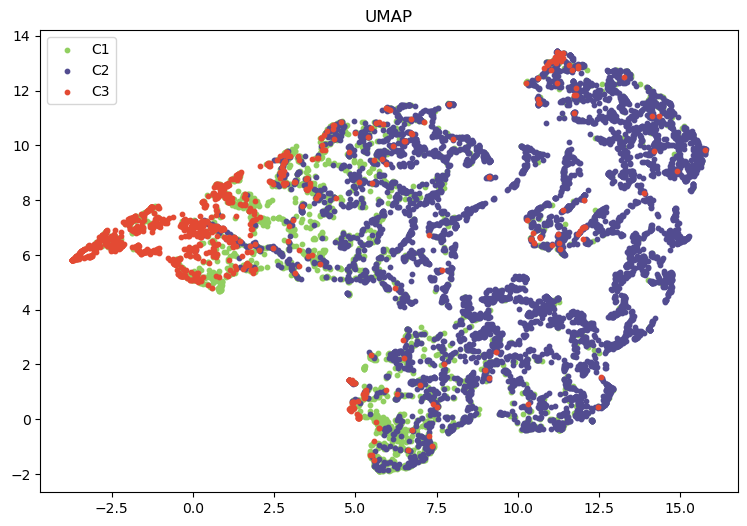

In [12]:
import numpy as np
from sklearn.preprocessing import scale 

df = df_fea_base_add
X_scaled = df[fea_select] #scale(df[fea_select])
y_ = df["groupHPD"].values
y_.astype(int)
plot_umap(X_scaled, y_)

In [13]:
# import numpy as np
# from sklearn.preprocessing import scale
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["groupHPD"].values
# y_.astype(int)
# plot_tsne(X_scaled, y_)

# Database Annotation

In [ ]:
# Obtain different types of data
data_type_ = "d1"
color_type = "groupHPD" #colorbar ; groupHPD;
df_fea_base_add, fea_select = get_data(df_fea_merge,data_type_)

In [ ]:
def plot_tsne(X,LABELS):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.manifold import TSNE
    colors = ['#fc8d59','#91cf60','#524C90','#e34a33','#845868','#e24fff','#ffffbf'] #['#fc8d59','#ffffbf','#91cf60','#524C90','#845868','#e24fff']
    n_cluster = len(list(set(LABELS)))  # Parameter Definition
    tsne = TSNE(n_components=2, perplexity=30,random_state=50)#50
    Y = tsne.fit_transform(X)
    Y = pd.DataFrame(Y,columns=['x','y'])
    label = pd.DataFrame(LABELS,columns=['label'])
    df_Y_with_label = pd.concat([Y, label],axis=1) # Generation of datasets with clustering labels
    i = 1 
    fig = plt.figure(figsize=(6,4))
    while i <= n_cluster:
        Y_with_onelabel = df_Y_with_label.loc[df_Y_with_label['label']==i].values
        plt.scatter(Y_with_onelabel[:, 0], Y_with_onelabel[:,1], color=colors[i],s=6, alpha=0.8)
        i += 1
    plt.legend(["MIMIC IV","AUMCdb","eICU"])
    plt.title("t-SNE")
    plt.show() 
    
def plot_umap(X,LABELS):
    import umap.umap_ as umap
    colors = ['#fc8d59','#91cf60','#524C90','#e34a33','#845868','#e24fff','#ffffbf']
    n_cluster = len(list(set(LABELS)))  # Parameter Definition
    
    Y = umap.UMAP( min_dist=0.001 ).fit_transform(X)
    Y = pd.DataFrame(Y,columns=['x','y'])
    label = pd.DataFrame(LABELS,columns=['label'])
    df_Y_with_label = pd.concat([Y, label],axis=1) # Generation of datasets with clustering labels
    
    i = 1 
    fig = plt.figure(figsize=(6,4))
    while i <= n_cluster:
        Y_with_onelabel = df_Y_with_label.loc[df_Y_with_label['label']==i].values
        plt.scatter(Y_with_onelabel[:, 0], Y_with_onelabel[:,1], color=colors[i],s=4, alpha=0.7)
        i += 1
    plt.legend(["MIMIC IV","AUMCdb","eICU"])
    plt.title('UMAP')
    plt.show()

In [16]:
# import numpy as np
# from sklearn.preprocessing import scale
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["dataset"].values
# y_.astype(int)
# plot_tsne(X_scaled, y_)

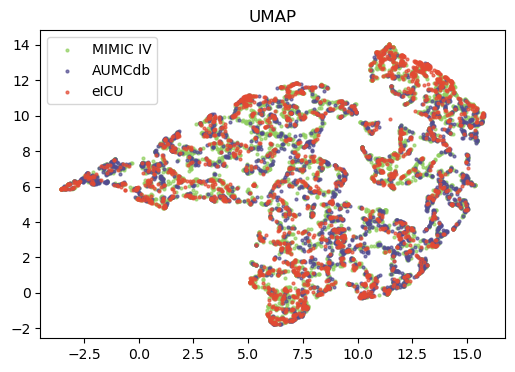

In [40]:
import numpy as np
from sklearn.preprocessing import scale
df = df_fea_base_add
X_scaled = df[fea_select] #scale(df[fea_select])
y_ = df["dataset"].values
y_.astype(int)
plot_umap(X_scaled, y_)

In [ ]:
# # Identify the independent parts of the EICU
# df = df_fea_base_add
# X,LABELS = X_scaled, y_
# import umap.umap_ as umap
# colors = ['#fc8d59','#91cf60','#524C90','#e34a33','#845868','#e24fff','#ffffbf']
# n_cluster = len(list(set(LABELS)))  

# y_stay_id = df["stay_id"].values
# Y = umap.UMAP( min_dist=0.001 ).fit_transform(X)
# Y = pd.DataFrame(Y,columns=['x','y'])
# label = pd.DataFrame(LABELS,columns=['label'])
# y_stay_id = pd.DataFrame(y_stay_id,columns=['stay_id'])
# df_Y_with_label = pd.concat([Y, label],axis=1) 
# df_Y_with_label = pd.concat([df_Y_with_label, y_stay_id],axis=1) 

# i = 1 
# fig = plt.figure(figsize=(6,4))
# while i <= n_cluster:
#     Y_with_onelabel = df_Y_with_label.loc[df_Y_with_label['label']==i].values
#     plt.scatter(Y_with_onelabel[:, 0], Y_with_onelabel[:,1], color=colors[i],s=8, alpha=1)
#     i += 1
# plt.axhline(y=7.2, color='r', linestyle='-')
# plt.axvline(x=2.5, color='b', linestyle='-')

# plt.legend(["MIMIC IV","AUMCdb","eICU"])
# plt.title('UMAP')
# plt.show()

In [ ]:
# df_select = df_Y_with_label[(df_Y_with_label["x"]>2.5)&(df_Y_with_label["y"]>7.2)&(df_Y_with_label["label"]==3)]
# df_select.to_csv("eicu_patient_middle_and_upper_right.csv",index=False)

# Feature Visualization

In [ ]:
def get_time_color(color_len,class_):
    if class_ == "1":
        start_hex = '#f7fcfd' #'' 
        end_hex = '#00441b' #'' 
    if class_ == "2": 
        start_hex = '#fff5f0' 
        end_hex = '#a50f15' 
    if class_ == "3": 
        start_hex = '#fcfbfd' 
        end_hex = '#3f007d' 
    if class_ == "4": 
        start_hex = '#377eb8' # '#a50f15' 
        end_hex =  "#f46d43" # '#3f007d' 
    start_rgb = hex_to_rgb(start_hex)
    end_rgb = hex_to_rgb(end_hex)
    gradient_array = linear_gradient(start_rgb, end_rgb, color_len)
    return gradient_array
color_map_dict = {1:"#00441b",2:"#e34a33",3:"#524C90"}
get_time_color(3,"1")

['#f7fcfd', '#7ca08c', '#00441b']

In [ ]:
# Obtain different types of data
data_type_ = "d1"
color_type = "groupHPD" # colorbar ; groupHPD;
df_fea_base_add, fea_select = get_data(df_fea_merge,data_type_)

# Add Color
# fea_ = "creatinine_mean"
# df_fea_base_add = df_fea_base_add.sort_values(fea_)
# color_len =  df_fea_base_add.shape[0]
# df_fea_base_add["colorbar"] = get_time_color(color_len,"4")

#############
### Test whether the gradient effect is presented according to the size of time
# cl = df_fea_base_add["colorbar"].tolist()
# x = np.arange(len(cl))
# y = np.random.rand(len(cl))
# colors = cl
# plt.bar(x, y, color=colors)
# plt.show()

In [ ]:
def plot_umap(X,LABELS):
    import umap.umap_ as umap
    Y = umap.UMAP( min_dist=0.001).fit_transform(X)
    Y = pd.DataFrame(Y,columns=['x','y'])
    label = pd.DataFrame(LABELS,columns=['label'])
    df_Y_with_label = pd.concat([Y, label],axis=1) # Data set generation with clustering labels
    df_Y_with_label["idx"] = range(len(df_Y_with_label))
    n_cluster = len(df_Y_with_label.label.tolist()) # Parameter definition
    
    i = 1 
    fig = plt.figure(figsize=(9,6))
    while i <= n_cluster:
        Y_with_onelabel = df_Y_with_label.loc[df_Y_with_label['idx']==i].values
        plt.scatter(Y_with_onelabel[:, 0], Y_with_onelabel[:,1], color=Y_with_onelabel[:,2],s=8, alpha=1)
        i += 1
    plt.title('UMAP')
    plt.xlabel(fea_)
    plt.show()

def plot_tsne(X,LABELS):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=50)#50
    Y = tsne.fit_transform(X)
    Y = pd.DataFrame(Y,columns=['x','y'])
    label = pd.DataFrame(LABELS,columns=['label'])
    df_Y_with_label = pd.concat([Y, label],axis=1) 
    df_Y_with_label["idx"] = range(len(df_Y_with_label))
    n_cluster = len(df_Y_with_label.label.tolist())

    i = 1 
    fig = plt.figure(figsize=(9,6)) 
    while i <= n_cluster:
        Y_with_onelabel = df_Y_with_label.loc[df_Y_with_label['idx']==i].values
        plt.scatter(Y_with_onelabel[:, 0], Y_with_onelabel[:,1], color=Y_with_onelabel[:,2],s=8, alpha=1)
        i += 1
    plt.title("t-SNE")
    plt.xlabel(fea_)
    plt.show() 

## creatinine_mean 

In [23]:
# fea_ = "creatinine" #"creatinine_mean"
# df_fea_base_add = df_fea_base_add.sort_values(fea_)
# color_len =  df_fea_base_add.shape[0]
# df_fea_base_add["colorbar"] = get_time_color(color_len,"4")
# df_fea_base_add = df_fea_base_add.sort_index()

# import numpy as nps
# from sklearn.preprocessing import scale 
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_umap(X_scaled, y_)
    
# import numpy as np
# from sklearn.preprocessing import scale
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_tsne(X_scaled, y_)

## creatinine_max

In [24]:
# fea_ = "creatinine_max"
# df_fea_base_add = df_fea_base_add.sort_values(fea_)
# color_len =  df_fea_base_add.shape[0]
# df_fea_base_add["colorbar"] = get_time_color(color_len,"4")
# df_fea_base_add = df_fea_base_add.sort_index()

# import numpy as nps
# from sklearn.preprocessing import scale 
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_umap(X_scaled, y_)
    
# import numpy as np
# from sklearn.preprocessing import scale
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_tsne(X_scaled, y_)

## creatinine_min

In [25]:
# fea_ = "creatinine_max"
# df_fea_base_add = df_fea_base_add.sort_values(fea_)
# color_len =  df_fea_base_add.shape[0]
# df_fea_base_add["colorbar"] = get_time_color(color_len,"4")
# df_fea_base_add = df_fea_base_add.sort_index()

# import numpy as nps
# from sklearn.preprocessing import scale 
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_umap(X_scaled, y_)
    
# import numpy as np
# from sklearn.preprocessing import scale
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_tsne(X_scaled, y_)

## crea_divide_basecrea_mean

In [26]:
# fea_ = "crea_divide_basecrea" #"crea_divide_basecrea_mean"
# df_fea_base_add = df_fea_base_add.sort_values(fea_)
# color_len =  df_fea_base_add.shape[0]
# df_fea_base_add["colorbar"] = get_time_color(color_len,"4")
# df_fea_base_add = df_fea_base_add.sort_index()

# import numpy as nps
# from sklearn.preprocessing import scale 
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_umap(X_scaled, y_)
    
# import numpy as np
# from sklearn.preprocessing import scale
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_tsne(X_scaled, y_)

## urineoutput_mean

In [27]:
# fea_ = "urineoutput" #"urineoutput_mean"
# df_fea_base_add = df_fea_base_add.sort_values(fea_)
# color_len =  df_fea_base_add.shape[0]
# df_fea_base_add["colorbar"] = get_time_color(color_len,"4")
# df_fea_base_add = df_fea_base_add.sort_index()

# import numpy as nps
# from sklearn.preprocessing import scale 
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_umap(X_scaled, y_)
    
# import numpy as np
# from sklearn.preprocessing import scale
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_tsne(X_scaled, y_)

# Feature Visualization - by time

In [ ]:
def get_time_color(color_len,class_):
    if class_ == "1":
        start_hex = '#f7fcfd' #'' 
        end_hex = '#00441b' #'' 
    if class_ == "2": 
        start_hex = '#fff5f0' 
        end_hex = '#a50f15' 
    if class_ == "3": 
        start_hex = '#fcfbfd' 
        end_hex = '#3f007d' 
    if class_ == "4":
        start_hex = '#377eb8' # '#a50f15' 
        end_hex =  "#f46d43" # '#3f007d' 
    start_rgb = hex_to_rgb(start_hex) 
    end_rgb = hex_to_rgb(end_hex)
    gradient_array = linear_gradient(start_rgb, end_rgb, color_len) 
    return gradient_array
color_map_dict = {1:"#00441b",2:"#e34a33",3:"#524C90"}
get_time_color(3,"1")

['#f7fcfd', '#7ca08c', '#00441b']

In [ ]:
def plot_tsne(X,LABELS):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=50)
    Y = tsne.fit_transform(X)
    Y = pd.DataFrame(Y,columns=['x','y'])
    label = pd.DataFrame(LABELS,columns=['label'])
    df_Y_with_label = pd.concat([Y, label],axis=1) 
    df_Y_with_label["idx"] = range(len(df_Y_with_label))
    n_cluster = len(df_Y_with_label.label.tolist())
    
    i = 1 
    fig = plt.figure(figsize=(6,4))
    while i <= n_cluster:
        Y_with_onelabel = df_Y_with_label.loc[df_Y_with_label['idx']==i].values
        plt.scatter(Y_with_onelabel[:, 0], Y_with_onelabel[:,1], color=Y_with_onelabel[:,2],s=8, alpha=1)
        i += 1
    plt.title("t-SNE")
    plt.xlabel(fea_)
    plt.show() 
    
def plot_umap(X,LABELS):
    import umap.umap_ as umap
    Y = umap.UMAP( min_dist=0.001).fit_transform(X)
    Y = pd.DataFrame(Y,columns=['x','y'])
    label = pd.DataFrame(LABELS,columns=['label'])
    df_Y_with_label = pd.concat([Y, label],axis=1) 
    df_Y_with_label["idx"] = range(len(df_Y_with_label))
    n_cluster = len(df_Y_with_label.label.tolist()) 
    
    i = 1 
    fig = plt.figure(figsize=(6, 4))
    while i <= n_cluster:
        Y_with_onelabel = df_Y_with_label.loc[df_Y_with_label['idx']==i].values
        plt.scatter(Y_with_onelabel[:, 0], Y_with_onelabel[:,1], color=Y_with_onelabel[:,2],s=8, alpha=1)
        i += 1
    plt.title('UMAP')
    plt.xlabel(fea_)
    plt.show()

In [ ]:
df_fea = df_fea_merge #pd.read_csv("sk_feature_timescale_Fb2.csv")
df_fea_base = df_fea[["stay_id","time","creatinine","urineoutput"]]
df_fea_base = df_fea_base[df_fea_base["time"].isin([-2,-1])]
df1 = df_fea_base.groupby(["stay_id"]).agg('mean').reset_index()
df1 = df1.drop(["time"],axis=1)
df1.columns = ["stay_id","creatinine_D-1","urineoutput_D-1"]

df_fea_base = df_fea[["stay_id","time","creatinine","urineoutput"]]
df_fea_base = df_fea_base[df_fea_base["time"].isin([1,2,3,4])]
df2 = df_fea_base.groupby(["stay_id"]).agg('mean').reset_index()
df2 = df2.drop(["time"],axis=1)
df2.columns = ["stay_id","creatinine_D1","urineoutput_D1"]

df_fea_base = df_fea[["stay_id","time","creatinine","urineoutput"]]
df_fea_base = df_fea_base.groupby('stay_id').apply(lambda x: x.iloc[-4:,1:])#.reset_index()
df3 = df_fea_base.groupby(["stay_id"]).agg('mean').reset_index()
df3 = df3.drop(["time"],axis=1)
df3.columns = ["stay_id","creatinine_outtime","urineoutput_outtime"]

def generate_time_color(fea_):
    df_color = pd.concat([df1,df2,df3],axis=0)
    if fea_ in ["creatinine_D-1","creatinine_D1","creatinine_outtime"]:
        df_color["creatinine"]= df_color["creatinine_D-1"] #.fillna(df_color["creatinine_D-1"],inplace=True)
        df_color["creatinine"].fillna(df_color["creatinine_D1"],inplace=True)
        df_color["creatinine"].fillna(df_color["creatinine_outtime"],inplace=True)
        df_color = df_color.sort_values("creatinine")
        color_len =  df_color.shape[0]
        df_color["colorbar"] = get_time_color(color_len,"4")
        color_dict = df_color.set_index(["creatinine"])['colorbar'].to_dict()
        
    if fea_ in ["urineoutput_D-1","urineoutput_D1","urineoutput_outtime"]:
        df_color["urineoutput"] = df_color["urineoutput_D-1"] #.fillna(df_color["urineoutput_D-1"],inplace=True)
        df_color["urineoutput"].fillna(df_color["urineoutput_D1"],inplace=True)
        df_color["urineoutput"].fillna(df_color["urineoutput_outtime"],inplace=True)
        df_color = df_color.sort_values("urineoutput")
        color_len =  df_color.shape[0]
        df_color["colorbar"] = get_time_color(color_len,"4")
        color_dict = df_color.set_index(["urineoutput"])['colorbar'].to_dict()
    return color_dict

## Creatinine

In [ ]:
data_type_ = "d1" 
data_type_ = "d1" 
df_fea_base_add, fea_select = get_data(df_fea_merge,data_type_)
df_fea_base_add = pd.merge(df_fea_base_add,df1, how="inner",on="stay_id")
df_fea_base_add = pd.merge(df_fea_base_add,df2, how="inner",on="stay_id")
df_fea_base_add = pd.merge(df_fea_base_add,df3, how="inner",on="stay_id")
df_fea_base_add["urineoutput_D1"].fillna(df_fea_base_add["urineoutput_outtime"], inplace=True)
df_fea_base_add["urineoutput_D-1"].fillna(df_fea_base_add["urineoutput_D1"], inplace=True)
df_fea_base_add["creatinine_D1"].fillna(df_fea_base_add["creatinine_outtime"], inplace=True)
df_fea_base_add["creatinine_D-1"].fillna(df_fea_base_add["creatinine_D1"], inplace=True)

fea_ =  "creatinine_D-1" #["creatinine_D-1","creatinine_D1","creatinine_outtime"]
color_dict = generate_time_color(fea_)
df_fea_base_add["colorbar"] = df_fea_base_add[fea_].map(color_dict)

import numpy as nps
from sklearn.preprocessing import scale 
df = df_fea_base_add
X_scaled = df[fea_select] #scale(df[fea_select])
y_ = df["colorbar"].values
plot_umap(X_scaled, y_)

# import numpy as np
# from sklearn.preprocessing import scale
# df = df_fea_base_add
# X_scaled = df[fea_select] #scale(df[fea_select]) s
# y_ = df["colorbar"].values
# plot_tsne(X_scaled, y_)

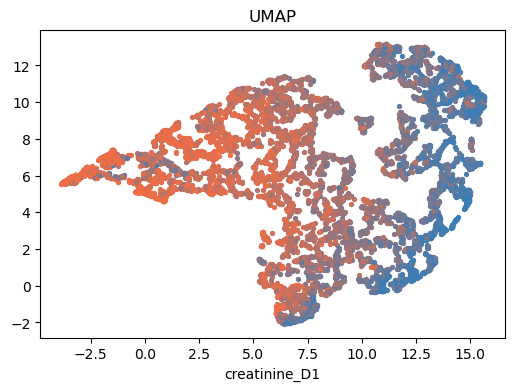

In [44]:
fea_ =  "creatinine_D1" #["creatinine_D-1","creatinine_D1","creatinine_outtime"]
color_dict = generate_time_color(fea_)
df_fea_base_add["colorbar"] = df_fea_base_add[fea_].map(color_dict)

import numpy as nps
from sklearn.preprocessing import scale 
df = df_fea_base_add
X_scaled = df[fea_select] #scale(df[fea_select])
y_ = df["colorbar"].values
plot_umap(X_scaled, y_)

# import numpy as np
# from sklearn.preprocessing import scale
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_tsne(X_scaled, y_)

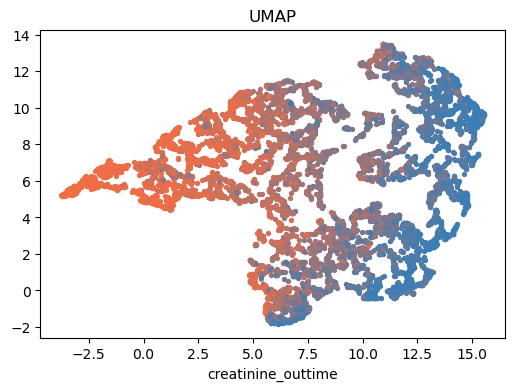

In [32]:
fea_ =  "creatinine_outtime" #["creatinine_D-1","creatinine_D1","creatinine_outtime"]
color_dict = generate_time_color(fea_)
df_fea_base_add["colorbar"] = df_fea_base_add[fea_].map(color_dict)

import numpy as nps
from sklearn.preprocessing import scale 
df = df_fea_base_add
X_scaled = df[fea_select] #scale(df[fea_select])
y_ = df["colorbar"].values
plot_umap(X_scaled, y_)

# import numpy as np
# from sklearn.preprocessing import scale
# df = df_fea_base_add
# X_scaled = df[fea_select] #scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_tsne(X_scaled, y_)

## urineoutput

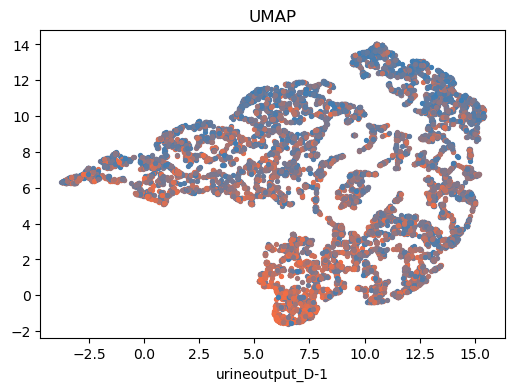

In [33]:
fea_ =  "urineoutput_D-1"  #["urineoutput_D-1","urineoutput_D1","urineoutput_outtime"]
color_dict = generate_time_color(fea_)
df_fea_base_add["colorbar"] = df_fea_base_add[fea_].map(color_dict)

import numpy as nps
from sklearn.preprocessing import scale 
df = df_fea_base_add
X_scaled = df[fea_select] #scale(df[fea_select])
y_ = df["colorbar"].values
plot_umap(X_scaled, y_)

# import numpy as np
# from sklearn.preprocessing import scale
# df = df_fea_base_add
# X_scaled = df[fea_select] #scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_tsne(X_scaled, y_)

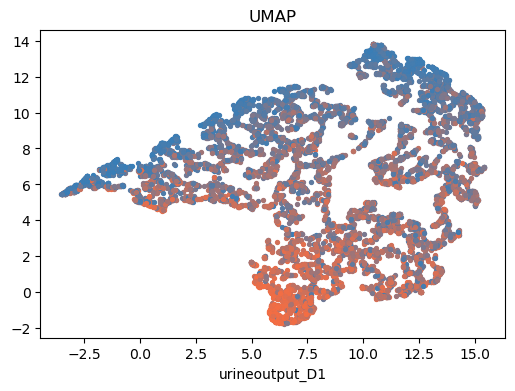

In [45]:
fea_ =  "urineoutput_D1"  #["urineoutput_D-1","urineoutput_D1","urineoutput_outtime"]
color_dict = generate_time_color(fea_)
df_fea_base_add["colorbar"] = df_fea_base_add[fea_].map(color_dict)

import numpy as nps
from sklearn.preprocessing import scale 
df = df_fea_base_add
X_scaled = df[fea_select] #scale(df[fea_select])
y_ = df["colorbar"].values
plot_umap(X_scaled, y_)

# import numpy as np
# from sklearn.preprocessing import scale
# df = df_fea_base_add
# X_scaled = scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_tsne(X_scaled, y_)

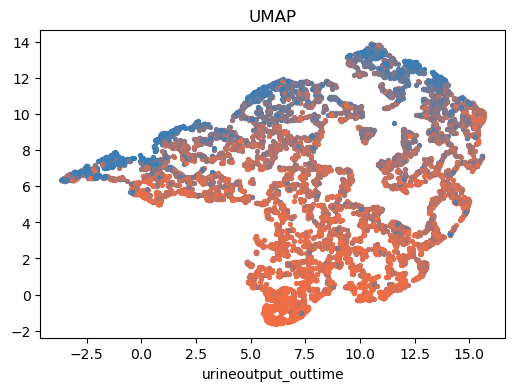

In [34]:
fea_ =  "urineoutput_outtime"  #["urineoutput_D-1","urineoutput_D1","urineoutput_outtime"]
color_dict = generate_time_color(fea_)
df_fea_base_add["colorbar"] = df_fea_base_add[fea_].map(color_dict)

import numpy as nps
from sklearn.preprocessing import scale 
df = df_fea_base_add
X_scaled = df[fea_select] #scale(df[fea_select])
y_ = df["colorbar"].values
plot_umap(X_scaled, y_)

# import numpy as np
# from sklearn.preprocessing import scale
# df = df_fea_base_add
# X_scaled = df[fea_select] #scale(df[fea_select])
# y_ = df["colorbar"].values
# plot_tsne(X_scaled, y_)